## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **Thursday, 9th February 2023 at 11:59 pm**. 

6. **Five points are properly formatting the assignment**. The breakdown is as follows:
- Must be an HTML file rendered using Quarto (1 pt). *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
- No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission  (1 pt)
- There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) (1 pt)
- Final answers of each question are written in Markdown cells (1 pt).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text (1 pt)

## Model assumptions

### 
Using *house_feature_train.csv* and *house_price_train.csv*, fit a multiple linear regression model without transformation to predict `house_price` based on `distance_MRT`, `latitude`, and `longitude`, `house_age`, and `number_convenience_stores`. Print the model summary. What is the model $R^2$? 

*(1 + 1 points)*

In [45]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api  as smf
import numpy.ma as ma
from scipy.stats.stats import pearsonr, normaltest
from scipy.spatial.distance import correlation
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [8]:
trainf=pd.read_csv("house_feature_train.csv")
trainp=pd.read_csv("house_price_train.csv")
train=pd.merge(trainf,trainp)

In [21]:
house_price_test = pd.read_csv('house_price_test.csv')
house_feature_test = pd.read_csv('house_feature_test.csv')
test = pd.merge(house_price_test, house_feature_test)

In [9]:
ols_object = smf.ols(formula = 'house_price~ distance_MRT+latitude+longitude+house_age+number_convenience_stores', data = train)
model = ols_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            house_price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     70.32
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           7.57e-47
Time:                        14:15:45   Log-Likelihood:                -2187.9
No. Observations:                 275   AIC:                             4388.
Df Residuals:                     269   BIC:                             4410.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

R2=  0.567

### 
Obtain the residuals and plot them separately against fitted values and each of the five feature variables. Make one plot including the 6 subplots. 

*(4 points)*

Text(0.5, 0, 'number_convenience_stores')

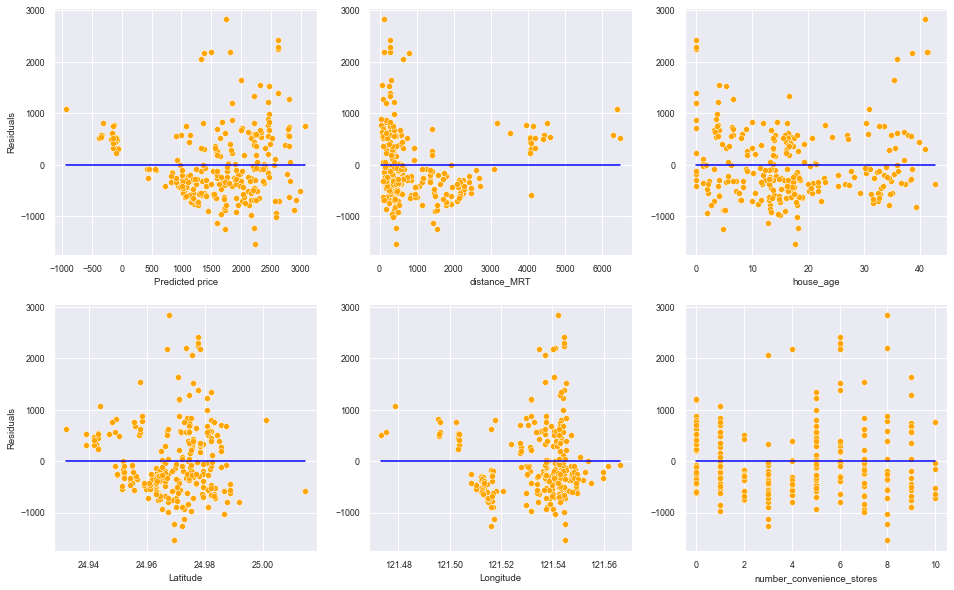

In [20]:
#Plotting residuals vs fitted values 

sns.set(font_scale=0.8)
plt.rcParams["figure.figsize"]= (16,10)  
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax= axes[0][0], x= model.fittedvalues, y=model.resid, color = 'orange')
sns.lineplot (ax = axes[0][0], x = [model.fittedvalues.min(),model.fittedvalues.max()], y =[0,0], color= 'blue')
axes[0][0].set_xlabel('Predicted price')
axes[0][0].set_ylabel('Residuals')

#Distance_MRT
sns.scatterplot(ax= axes[0][1], x= train.distance_MRT, y=model.resid, color= 'orange')
sns.lineplot (ax = axes[0][1], x = [train.distance_MRT.min(),train.distance_MRT.max()], y =[0,0], color= 'blue')
axes[0][1].set_xlabel('distance_MRT')

#Latitude
sns.scatterplot(ax= axes[1][0], x= train.latitude, y=model.resid, color= 'orange')
sns.lineplot (ax = axes[1][0], x = [train.latitude.min(),train.latitude.max()], y =[0,0], color= 'blue')
axes[1][0].set_xlabel('Latitude')
axes[1][0].set_ylabel('Residuals')

#Longitude 
sns.scatterplot(ax= axes[1][1], x= train.longitude, y=model.resid, color= 'orange')
sns.lineplot (ax = axes[1][1], x = [train.longitude.min(),train.longitude.max()], y =[0,0], color= 'blue')
axes[1][1].set_xlabel('Longitude')

#House Age
sns.scatterplot(ax= axes[0][2], x= train.house_age, y=model.resid, color= 'orange')
sns.lineplot (ax = axes[0][2], x = [train.house_age.min(),train.house_age.max()], y =[0,0], color= 'blue')
axes[0][2].set_xlabel('house_age')

#Number_convenience_stores
sns.scatterplot(ax= axes[1][2], x= train.number_convenience_stores, y=model.resid, color= 'orange')
sns.lineplot (ax = axes[1][2], x = [train.number_convenience_stores.min(),train.number_convenience_stores.max()], y =[0,0], color= 'blue')
axes[1][2].set_xlabel('number_convenience_stores')


### 
Comment on the plot of residuals against fitted values. Does the model violate the assumption of linearity? Does the model violate the constant variance assumption?

*(2 + 2 points)*

There is some non-lineartiy in the model because the residuals are not evenly distributed. The constant variance assumption is not met since the residuals appear to get larger as the predicted price increases

### 
Comment on the plot of residuals against the predictor variables. On the basis of these plots, should any further modifications of the regression model be attempted?

*(5 points)*

The graph for distance_MRT shows some signs of non-linearity, and transforming this variable would likely improve the results. The relationship between latitude and longitude with the predictor may also benefit from transformation, although it is less certain what transformation would be effective. In contrast, house age and the number of convenience stores seem to have a linear relationship with the predictor.

### 
Calculate the RMSE using the test datasets for the model constructed in the first question. The test datasets are *house_feature_test.csv* and *house_price_test.csv*.

*(2 points)*

In [22]:
pred_price = model.predict(test)
print(np.sqrt(((test['house_price']-pred_price)**2).mean()))

510.0202466833375


The RMSE is 510.0202466833375. 

### 
Using appropriate transformation(s) and/or variable interaction(s), update the model to obtain a model that has a $R^{2}$ of at least 80%, and a RMSE (Root mean squared error) of at max \$350k on test data. 

Print the model summary and report the $R^2$, and RMSE on test data. 
Note:

1. House prices are provided in thousands of dollars. A value of 556 in the `house_price` column indicates a house price of \$556k. 

2. The test datasets are *house_feature_test.csv* and *house_price_test.csv*. 

3.  $R^2$ is computed on training data, and RMSE is computed on test data.

4. You must proceed logically, i.e., **justify every transformation** that you introduce into the model to improve it. If you are introducing **interactions**, there should be some rationale behind including only certain interactions in the model, unless you are including all possible interactions.

*(12 points for achieving the objectives + 8 points for justifications)*

Justifications:First, Since the response varaible violates the constant variance assumption we should take the log.  Second, Distance_MRT is not linear so we should take the cuibic term. 

In [36]:
ols_object = smf.ols(formula = 'np.log(house_price)~distance_MRT+I(distance_MRT**2)+I(distance_MRT**3)+latitude+longitude+house_age+number_convenience_stores',data = train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(house_price)   R-squared:                       0.809
Model:                             OLS   Adj. R-squared:                  0.804
Method:                  Least Squares   F-statistic:                     161.5
Date:                 Sun, 12 Feb 2023   Prob (F-statistic):           4.01e-92
Time:                         19:04:50   Log-Likelihood:                -93.905
No. Observations:                  275   AIC:                             203.8
Df Residuals:                      267   BIC:                             232.7
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  -682.4408    287.772     -2.371      0.018   -1249.031    -115.851
distance_MRT                 -0.0010      0.000     -9.493      0.000      -0.001      -0.001
I(distance_MRT ** 2)       2.989e-07   4.72e-08      6.331      0.000    2.06e-07    3.92e-07
I(distance_MRT ** 3)      -2.942e-11   5.44e-12     -5.406      0.000   -4.01e-11   -1.87e-11
latitude                     20.7729      2.207      9.411      0.000      16.427      25.119
longitude                     1.4120      2.269      0.622      0.534      -3.056       5.880
house_age                    -0.0125      0.002     -6.644      0.000      -0.016      -0.009
number_convenience_stores     0.0334      0.010      3.493      0.001       0.015       0.052
==============================================================================
Omnibus:                        5.874   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                8.644
Skew:                          -0.045   Prob(JB):                       0.0133
Kurtosis:                       3.864   Cond. No.                     4.69e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
pred_price = model.predict(test)
print(np.sqrt(((test['house_price']-np.exp(pred_price))**2).mean()))

342.7378102812341


### 
Are the assumptions of linearity and constant variance of errors satisfied in the model developed in the previous question? Make a scatterplot between the residuals and fitted values and use it to answer the question.

*(4 points)*

<AxesSubplot:>

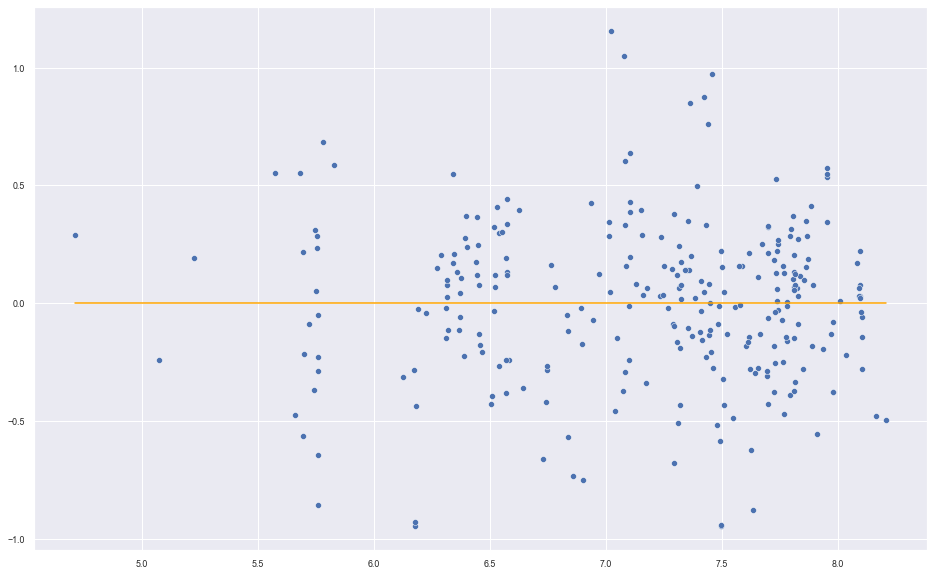

In [31]:
sns.scatterplot(x = model.fittedvalues, y = model.resid)
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'orange')

Both constant variance and linearity seem to be satisfied. 

## Multicollinearity and Outliers

The datasets *Austin_Affordable_Housing_Train.csv* and *Austin_Affordable_Housing_Test.csv* provide data on housing development projects that have received funding from the Affordable Housing Development Fund in Austin, Texas. The city provides property developers with tax credits and other forms of funding in exchange for agreements to set housing prices (e.g. rent) below market rate.

Each row represents a housing development in Austin. Variables include the amount (USD) provided by the city, the status of the housing project, the number of housing units, the period of affordability, and more.

Let's say that you're hired by the city as a consultant to work with subject matter experts in their Housing and Planning Department.

*General Hint:* For written sections, writing "it depends" (along with an explanation) often characterizes a good answer.

**Note for Grading Team:** Written answers should be given full credit as long as they're thoughtful answers that address the question fully, base findings on relevant data/results, and align with the relevant regression theory/thinking. Many questions don't have a single right answer and/or depend on context that isn't provided here.

In [27]:
house_test = pd.read_csv('Austin_Affordable_Housing_Test.csv')
house_train = pd.read_csv('Austin_Affordable_Housing_Train.csv')

### 
Suppose you run the code `status_vars = pd.get_dummies(housing_dataframe["Status"])`, append the columns of `status_vars` to your original data frame, and use the columns as predictors in a linear regression model. What potential problem would you likely be introducing into the model? How could it affect your results? 

*(4 points)*

Incorporating all the dummy variables in the model without a reference category would result in severe multicollinearity due to the exact linear relationship between the dummy predictors, which can be expressed as the sum of all the dummies being equal to 1. To correctly handle this relationship, a reference category should be established, meaning a dummy variable whose results can be determined when the rest of the dummies are set to zero. This would have a negative impact on the R^2 value, causing it to decrease, and would also increase the variance of the model parameters.

### 
Suppose that a subject matter expert recommends using the variables `Total_Units`, `Total_Affordable_Units`, `Total_Accessible_Units`, and `Market_Rate_Units` as predictors in your model. From a regression modeling standpoint, does this sound advisable? Produce metrics to quantify the potential impact of including the four predictors in a model. Interpret at least one of the metrics you provide, both statistically and in the context of the problem.

*(4 points)*

In [38]:
X = house_train[['Total_Units', 'Total_Affordable_Units', 'Total_Accessible_Units', 'Market_Rate_Units']]

X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["predictor"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                predictor         VIF
0                   const    1.245882
1             Total_Units  234.528279
2  Total_Affordable_Units  159.751905
3  Total_Accessible_Units    2.033927
4       Market_Rate_Units   40.571755


The answer depends on your objective. If you aim to make predictions, you can use the predictors as long as they are significant and the required assumptions are met. On the other hand, if you intend to use the model for inference, it would not be suitable to use it. The high VIF scores indicate a strong collinearity among the regressors, which would render the coefficients and standard errors produced by the model unreliable.

### 
Say that the subject matter expert agrees to use `Total_Affordable_Units`, `Affordability_Expiration_Year`, and `Units_Under_50_Percent_MFI` as predictors for `City_Amount`. Fit the appropriate model (without transformations). Then interpret the results associated with `Total_Affordable_Units`, and comment on the overall model fit.

*(4 points)*

In [39]:
ols_object = smf.ols(formula = 'City_Amount~Total_Affordable_Units+Affordability_Expiration_Year+Units_Under_50_Percent_MFI',data = house_train)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            City_Amount   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     63.08
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           1.37e-28
Time:                        19:16:11   Log-Likelihood:                -3056.1
No. Observations:                 200   AIC:                             6120.
Df Residuals:                     196   BIC:                             6133.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -8.409e+06   4.35e+06     -1.933      0.055    -1.7e+07    1.72e+05
Total_Affordable_Units         2.261e+04   2059.042     10.983      0.000    1.86e+04    2.67e+04
Affordability_Expiration_Year  4233.1306   2125.847      1.991      0.048      40.661    8425.600
Units_Under_50_Percent_MFI    -8946.2892   3784.569     -2.364      0.019   -1.64e+04   -1482.585
==============================================================================
Omnibus:                      137.743   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3152.792
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                      21.960   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
pred = model.predict(house_test)
print(np.sqrt(((house_test['City_Amount']-pred)**2).mean()))

787388.3685514118


The significance of the coefficient Total_Affordable_Units is statistically significant at a 0.01 level. The regression results indicate that a 1 unit increase in the number of total affordable units leads to a rise of 22,610 in the city amount. 

The performance of the model is satisfactory, with an R^2 value of 0.491. The RMSE appears to be large, however, there is no reference to compare it with. 

### 
Using visualizations, investigate whether the model you fit in in the previous question yields outlying observations. What count and proportion of observations would you classify as outliers?

Note: Show separate plots for both - residuals and studentized residuals. However, consider studentized residuals when identifying outliers.

*(4 points)*

Text(0, 0.5, 'Studentized Residuals')

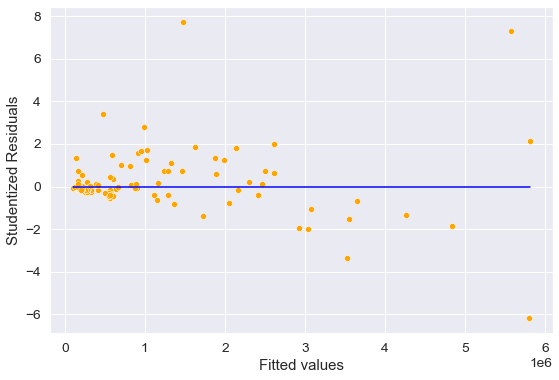

In [41]:
out = model.outlier_test()

plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=out.student_resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Studentized Residuals')

Text(0, 0.5, 'Residuals')

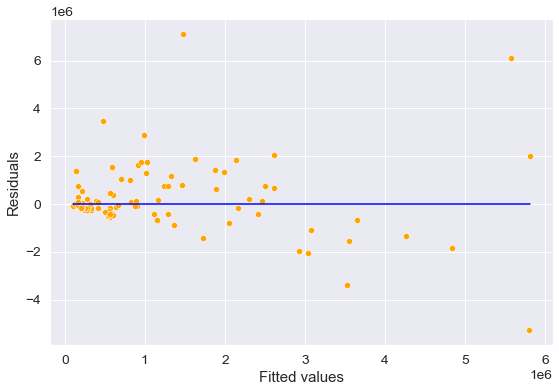

In [42]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set(font_scale=1.25)
ax = sns.scatterplot(x = model.fittedvalues, y=model.resid,color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

In [43]:
np.sum(np.abs(out.student_resid) > 4)

3

I would say three. I established my threshold for the studentized residuals at 4. There are several extreme outliers, including a few close to 6, which is a concern. Apart from these, it would not be appropriate to identify anything else as an outlier.

### 
Based on your results in the previous question, would you choose to remove outlying observations? Why or why not?

*(4 points)*

Yes, the outliers are affecting the results of the analysis. They appear to be a small number, but they are distorting the results. In this case, these outliers are also notably large, and it would be beneficial to remove them.

### 
Consider a scenario in which the model will be used by property owners seeking to predict the amount of money they may receive from the city of Austin. How would this change, support, or complicate your answer in the previous question, if at all?

*(3 points)*

No it does not change the answer, it supports it. The outliers are having a noticeable impact on the accuracy of the model predictions, and removing them would result in more accurate predictions for the property owners.

### 
Say that the model will be used by a team of sociologists seeking statistical evidence at the $\alpha = 0.01$ significance level that a property's affordability expiration year has an effect on the amount of money issued by the city of Austin? How would this change, support, or complicate your answer in C.2.5, if at all?

*(3 points)*

The inclusion of all data points could potentially complicate the answer. However, I would argue that it would still be advantageous to remove the outliers, as it could enhance the significance of the affordability variable. Additionally, since there are only a few outliers, their removal likely would not have a major impact on the overall results.

### 
Determine whether the model you fit in C.2.3 contains any high-leverage points. Produce a visualization, then report the count and proportions of observations that are high-leverage *(define an observation as "high-leverage" if its leverage is greater than four times the average leverage of all observations)*. 

*(4 points)*

In [44]:
#Computing the leverage statistic for each observation
influence = model.get_influence()
leverage = influence.hat_matrix_diag


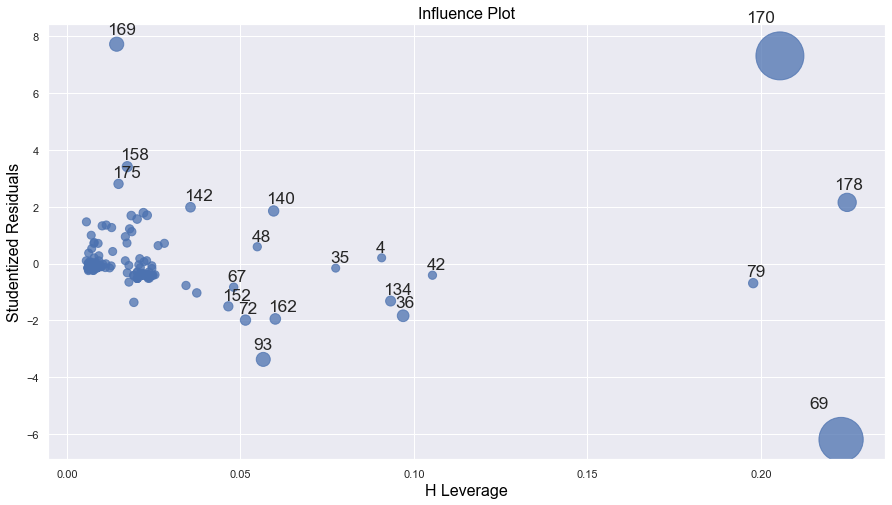

In [46]:
#Visualizng leverage against studentized residuals
sns.set(rc={'figure.figsize':(15,8)})
sm.graphics.influence_plot(model);

In [47]:
#Average leverage of points
average_leverage = (model.df_model+1)/model.nobs
average_leverage

0.02

In [48]:
high_leverage_threshold = 4*average_leverage
#Number of high leverage points in the dataset
np.sum(leverage>high_leverage_threshold)

8

From the 200 observations, there are 8 high leverage points.

### 
Based on your results in the previous question, would you choose to remove high-leverage observations? Why or why not?

*(3 points)*

Yes. They should be removed since they are skewing our line. The proportion of high leverage points are fairly low.

### 
Identify and remove any influential points from the training data and refit the model. How does removing influential affect the model, if at all?

Think about using the model summary, and use the test data provided.

*(6 points)*

In [49]:
#Dropping influential points from data
house_train_filtered = house_train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>4)[0],
                                           (np.where(leverage>high_leverage_threshold)[0])))

In [50]:
ols_object = smf.ols(formula = 'City_Amount~Total_Affordable_Units+Affordability_Expiration_Year+Units_Under_50_Percent_MFI',data = house_train_filtered)
model = ols_object.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            City_Amount   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     65.77
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           2.20e-29
Time:                        20:29:51   Log-Likelihood:                -2991.3
No. Observations:                 198   AIC:                             5991.
Df Residuals:                     194   BIC:                             6004.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -8.381e+06   3.66e+06     -2.289      0.023   -1.56e+07   -1.16e+06
Total_Affordable_Units          2.17e+04   2272.150      9.550      0.000    1.72e+04    2.62e+04
Affordability_Expiration_Year  4219.4469   1788.564      2.359      0.019     691.921    7746.973
Units_Under_50_Percent_MFI    -7698.1883   3746.489     -2.055      0.041   -1.51e+04    -309.109
==============================================================================
Omnibus:                      178.422   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4872.165
Skew:                           3.211   Prob(JB):                         0.00
Kurtosis:                      26.438   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
pred = model.predict(house_test)
print(np.sqrt(((house_test['City_Amount']-pred)**2).mean()))

778947.8973204951


No significant change in RMSE. R2 is slightly up and more singinficance in regressors. The model is better for inference and possibiliy for prediction. 

## Autocorrelation

Refer to the autocorrelation example in the [class notes](https://nustat.github.io/STAT303-2-class-notes/Lec6_Autocorrelation.html). Predict the power consumption for each hour of each day of the year 2020. For predicting a power consumption on a particular hour of a day, use all the data you have until the previous day. However, don't use any data of the day on which you are making the predictions. For example, for making 24 predictions for each hour of 4th April, 2020, use all the data upto 3rd April 2020. Make the predictions using four different models:

1. Model with only `temp_hot` and `temp_cold` as the predictors

2. Model including one day lag of power as a predictor in addition to the predictors in model (1)

3. Model including one week lag of power as a predictor in addition to the predictors in model (2)

4. Model including two weeks lag of power as a predictor in addition to the predictors in model (3)

For each model:

1. Report the RMSE for the predicted power in 2020. You should have 366 x 24 = 8784 predicted values of power for each model.

2. Make a scatterplot of predicted power vs actual power *(use color = 'orange')*. Plot the line x = y over the scatterplot *(use color = 'blue')*. 

Which model makes the most accurate predictions?

*(4 points for developing the models + 4 points for computing the predictions + 4 points for computing the RMSEs + 2 points for the visualizations + 1 point for identifying the most accurate model)*

In [68]:
df = pd.read_csv('Toronto_power_demand.csv', parse_dates=['Date'], index_col=0)

df['temperature']=df['temperature'].shift(24*1)

df.tail()

,Date,Hour,power,temperature
key,,,,
20201231:19,2020-12-31,19,5948,4.9
20201231:20,2020-12-31,20,5741,4.5
20201231:21,2020-12-31,21,5527,3.7
20201231:22,2020-12-31,22,5301,2.9
20201231:23,2020-12-31,23,5094,2.1


In [69]:
is_hot=(df['temperature']>15).astype(int)
print("{:f}% of data points are hot".format(is_hot.mean()*100))
df['temp_hot']=df['temperature']*is_hot
df['temp_cold']=df['temperature']*(1-is_hot)
df.tail()

34.813484% of data points are hot


,Date,Hour,power,temperature,temp_hot,temp_cold
key,,,,,,
20201231:19,2020-12-31,19,5948,4.9,0.0,4.9
20201231:20,2020-12-31,20,5741,4.5,0.0,4.5
20201231:21,2020-12-31,21,5527,3.7,0.0,3.7
20201231:22,2020-12-31,22,5301,2.9,0.0,2.9
20201231:23,2020-12-31,23,5094,2.1,0.0,2.1


In [70]:
import numpy.ma as ma
from scipy.stats.stats import pearsonr, normaltest
from scipy.spatial.distance import correlation
import datetime as dt

# adjust the build model to account for date
def build_model(features, date):   
    X=sm.add_constant(df.loc[df.Date<date][features]) 
    y=df.loc[df.Date<date]['power'] 
    model = sm.OLS(y,X, missing='drop').fit()
    predictions = model.predict(X) 
    res=y-predictions
    return res, model 

In [71]:
# Model with only temp_hot and temp_cold as the predictors

# Filter the dates
dates = pd.date_range(dt.datetime(2020,1,1), periods = 366)


pred = pd.Series()

sse = 0

for i in range(366):
    res, model =build_model(['temp_hot', 'temp_cold'], dates[i])
    test = df.loc[df.Date==dates[i], :] 
    pred_temp = model.predict(sm.add_constant(test[['temp_hot', 'temp_cold']]))
    pred = pd.concat([pred, pred_temp]) 
    sse = sse+((test['power']-pred)**2).sum() 
    
# RMSE
np.sqrt(sse/(24*366))

<ipython-input-71-048927645ee3>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred = pd.Series()


911.8406436224783

/Users/abm7053/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted')

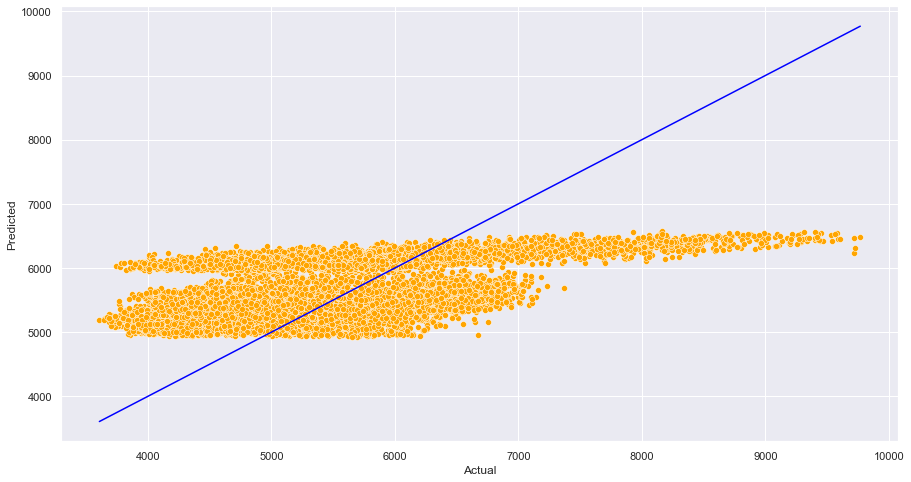

In [72]:
# Scatterplot 

sns.scatterplot(x=df.loc[df.Date.dt.strftime('%Y') == '2020', 'power'], y=pred, color='orange')
sns.lineplot([df.power.min(), df.power.max()],[df.power.min(), df.power.max()], color='blue') 
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [73]:
#Model including one day lag of power as a predictor in addition to the predictors in model (1)

# one day shift
df['power_lag_1day']=df['power'].shift(24)
df.tail()

,Date,Hour,power,temperature,temp_hot,temp_cold,power_lag_1day
key,,,,,,,
20201231:19,2020-12-31,19,5948,4.9,0.0,4.9,6163.0
20201231:20,2020-12-31,20,5741,4.5,0.0,4.5,5983.0
20201231:21,2020-12-31,21,5527,3.7,0.0,3.7,5727.0
20201231:22,2020-12-31,22,5301,2.9,0.0,2.9,5428.0
20201231:23,2020-12-31,23,5094,2.1,0.0,2.1,5104.0


In [74]:
# model 

pred = pd.Series()

sse = 0

for i in range(366):
    res, model =build_model(['temp_hot', 'temp_cold', 'power_lag_1day'], dates[i])
    test = df.loc[df.Date==dates[i], :] # use only 2020 dates
    pred_temp = model.predict(sm.add_constant(test[['temp_hot', 'temp_cold', 'power_lag_1day']]))
    pred = pd.concat([pred, pred_temp]) # add newly predicted values to all prediction values
    sse = sse+((test['power']-pred)**2).sum()  #sse = sum of yi - yi_hat squared 

# RMSE
np.sqrt(sse/(24*366))

<ipython-input-74-f35d39ef3518>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred = pd.Series()


426.2937654258814

/Users/abm7053/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted one day lag')

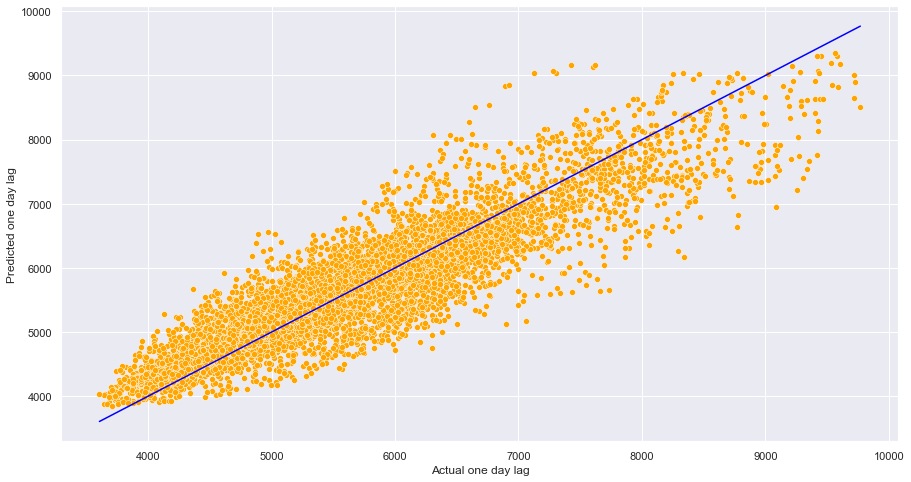

In [75]:
# Scatterplot

sns.scatterplot(x=df.loc[df.Date.dt.strftime('%Y') == '2020', 'power'], y=pred, color='orange')
sns.lineplot([df.power.min(), df.power.max()],[df.power.min(), df.power.max()], color='blue') 
plt.xlabel('Actual one day lag')
plt.ylabel('Predicted one day lag')

In [76]:
#Model including one week lag of power as a predictor in addition to the predictors in model (2)

#shift
df['power_lag_1week']=df['power'].shift(24*7)
df.tail()

,Date,Hour,power,temperature,temp_hot,temp_cold,power_lag_1day,power_lag_1week
key,,,,,,,,
20201231:19,2020-12-31,19,5948,4.9,0.0,4.9,6163.0,5833.0
20201231:20,2020-12-31,20,5741,4.5,0.0,4.5,5983.0,5665.0
20201231:21,2020-12-31,21,5527,3.7,0.0,3.7,5727.0,5474.0
20201231:22,2020-12-31,22,5301,2.9,0.0,2.9,5428.0,5273.0
20201231:23,2020-12-31,23,5094,2.1,0.0,2.1,5104.0,5010.0


In [77]:
# model 
pred = pd.Series()

sse = 0

for i in range(366):
    res, model =build_model(['temp_hot', 'temp_cold', 'power_lag_1day', 'power_lag_1week'], dates[i])
    test = df.loc[df.Date==dates[i], :] 
    pred_temp = model.predict(sm.add_constant(test[['temp_hot', 'temp_cold', 'power_lag_1day', 'power_lag_1week']]))
    pred = pd.concat([pred, pred_temp]) 
    sse = sse+((test['power']-pred)**2).sum()  

# RMSE
np.sqrt(sse/(24*366))

<ipython-input-77-281f8004334c>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred = pd.Series()


393.9446447023981

/Users/abm7053/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted one week lag')

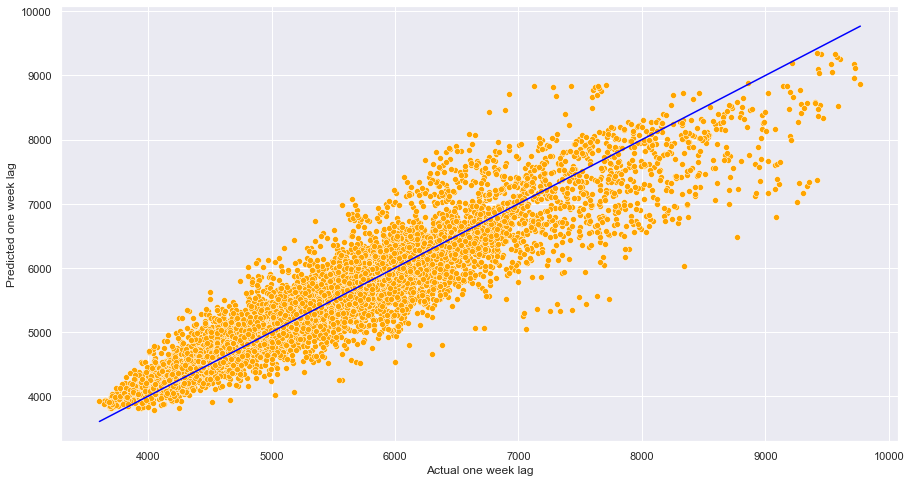

In [78]:
# Scatterplot 

sns.scatterplot(x=df.loc[df.Date.dt.strftime('%Y') == '2020', 'power'], y=pred, color='orange')
sns.lineplot([df.power.min(), df.power.max()],[df.power.min(), df.power.max()], color='blue') 
plt.xlabel('Actual one week lag')
plt.ylabel('Predicted one week lag')

In [79]:
#Model including two weeks lag of power as a predictor in addition to the predictors in model 
df['power_lag_2_week']=df['power'].shift(24*7*2)
df.tail()

,Date,Hour,power,temperature,temp_hot,temp_cold,power_lag_1day,power_lag_1week,power_lag_2_week
key,,,,,,,,,
20201231:19,2020-12-31,19,5948,4.9,0.0,4.9,6163.0,5833.0,6826.0
20201231:20,2020-12-31,20,5741,4.5,0.0,4.5,5983.0,5665.0,6663.0
20201231:21,2020-12-31,21,5527,3.7,0.0,3.7,5727.0,5474.0,6407.0
20201231:22,2020-12-31,22,5301,2.9,0.0,2.9,5428.0,5273.0,6068.0
20201231:23,2020-12-31,23,5094,2.1,0.0,2.1,5104.0,5010.0,5709.0


In [80]:
# model 
pred = pd.Series()

sse = 0

for i in range(366):
    res, model =build_model(['temp_hot', 'temp_cold', 'power_lag_1day', 'power_lag_1week', 'power_lag_2_week'], dates[i])
    test = df.loc[df.Date==dates[i], :] 
    pred_temp = model.predict(sm.add_constant(test[['temp_hot', 'temp_cold', 'power_lag_1day', 'power_lag_1week', 'power_lag_2_week']]))
    pred = pd.concat([pred, pred_temp]) 
    sse = sse+((test['power']-pred)**2).sum()  

# RMSE
np.sqrt(sse/(24*366))

<ipython-input-80-f39d5c7a9274>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred = pd.Series()


384.7570449278973

/Users/abm7053/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted two week lag')

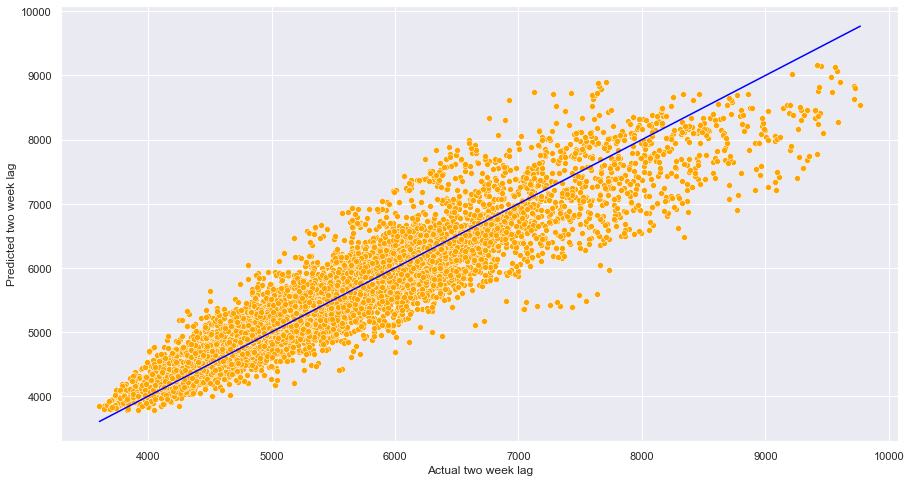

In [81]:
# Scatterplot

sns.scatterplot(x=df.loc[df.Date.dt.strftime('%Y') == '2020', 'power'], y=pred, color='orange')
sns.lineplot([df.power.min(), df.power.max()],[df.power.min(), df.power.max()], color='blue') 
plt.xlabel('Actual two week lag')
plt.ylabel('Predicted two week lag')

Based on the visualizations, it appears that the model with a two-week lag performed best. The model had the lowest RMSE and proximity of the points to the line in the scatterplot is the closest.